<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/9%20Convolutional%20Neural%20Network/CNN_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Popular CNN Architectur -- LeNet-5

In [ ]:
%pip install \
  numpy==2.0.2 \
  scikit-learn==1.6.1 \
  matplotlib==3.10.0 \
  keras==3.10.0

In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

### Load MNIST Dataset

In [ ]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

# Expand channel dimension: (28,28) -> (28,28,1)
X_train = X_train[..., np.newaxis]
X_test  = X_test[..., np.newaxis]


11490434/11490434 [==============================] - 1s 0us/step
X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


### Build LeNet-5

In [ ]:
num_classes = 10

lenet5 = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Rescaling(1./255),              # normalize pixels to [0, 1]

    # C1: conv(6 @ 5x5) + ReLU
    layers.Conv2D(6, kernel_size=(5, 5), padding="same", activation="relu"),
    # S2: average pooling
    layers.AveragePooling2D(pool_size=(2, 2)),

    # C3: conv(16 @ 5x5) + ReLU
    layers.Conv2D(16, kernel_size=(5, 5), padding="same", activation="relu"),
    # S4: average pooling
    layers.AveragePooling2D(pool_size=(2, 2)),

    # Flatten + fully connected
    layers.Flatten(),
    layers.Dense(120, activation="relu"),
    layers.Dense(84,  activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
], name="LeNet5_MNIST")

lenet5.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

lenet5.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
batch_size = 128
epochs = 100

history = lenet5.fit(
    X_train, y_train.ravel(),
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    verbose=2,
    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)


Epoch 1/100
469/469 - 15s - loss: 0.3336 - accuracy: 0.8997 - val_loss: 0.1139 - val_accuracy: 0.9645 - 15s/epoch - 31ms/step
Epoch 2/100
469/469 - 2s - loss: 0.0899 - accuracy: 0.9724 - val_loss: 0.0738 - val_accuracy: 0.9768 - 2s/epoch - 4ms/step
Epoch 3/100
469/469 - 2s - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.0528 - val_accuracy: 0.9842 - 2s/epoch - 4ms/step
Epoch 4/100
469/469 - 2s - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0432 - val_accuracy: 0.9868 - 2s/epoch - 4ms/step
Epoch 5/100
469/469 - 2s - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0456 - val_accuracy: 0.9855 - 2s/epoch - 4ms/step
Epoch 6/100
469/469 - 2s - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0408 - val_accuracy: 0.9870 - 2s/epoch - 4ms/step
Epoch 7/100
469/469 - 2s - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0461 - val_accuracy: 0.9838 - 2s/epoch - 4ms/step
Epoch 8/100
469/469 - 2s - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0482 - val_accuracy: 0.9851 - 2s/epoch - 4ms/step
Epoch 9/100
4

### Evaluate LeNet-5

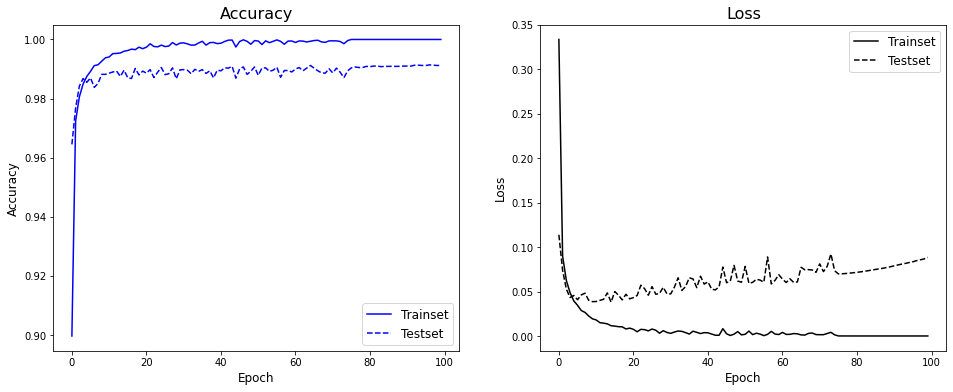

In [6]:
# plot history for accuracy and history for loss
fig = plt.figure(1, figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label="Trainset", c='blue')
plt.plot(history.history['val_accuracy'], label="Testset", c='blue', ls='--')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='best', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Trainset", c='k')
plt.plot(history.history['val_loss'], label="Testset", c='k', ls='--')
plt.title('Loss', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig("lenet5_on_cifar-10.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
test_loss, test_acc = lenet5.evaluate(X_test, y_test.ravel(), verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0884 - accuracy: 0.9912
Test loss: 0.08838732540607452
Test accuracy: 0.9911999702453613


In [8]:
y_pred = lenet5.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

313/313 [==============================] - 1s 2ms/step
Accuracy Score:
 0.9912
Confusion matrix:
 [[ 974    0    0    0    0    0    3    1    2    0]
 [   0 1132    1    1    0    0    1    0    0    0]
 [   0    1 1024    1    0    0    1    3    2    0]
 [   0    0    2 1004    0    2    0    0    1    1]
 [   0    0    1    0  974    0    3    0    0    4]
 [   2    0    0    5    0  883    1    0    0    1]
 [   2    3    0    0    2    3  946    0    2    0]
 [   0    1    4    1    0    0    0 1019    1    2]
 [   2    0    1    2    0    3    0    1  961    4]
 [   0    0    0    0    7    3    0    2    2  995]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.9